# TP01 - Regresión lineal

## Soluciones óptimas 

<p align="center">
  <image src="https://github.com/walteraguirre/TPS/blob/main/TP01/imagenes/ej_a.png?raw=true" alt="Descripción de la imagen">
</p>





# Esperanza condicional

Por definición la esperanza condicional la podemos calcular de la siguiente manera:

$E[Y|X = x] = \int ^{\infty} _{- \infty} y \ f_{Y|X = x}(y) \ dy$

Donde $f_{Y|X = x}(y)$ es la densidad de probabilidad de Y dado X, y la podemos obtener a partir de la siguiente expresión:

$$
\text{1.} \quad f_{Y|X = x}(y) = \frac{p_{XY}(x, y)}{p_X(x)}
$$

Para ello, debemos obtener la densidad marginal $p_X(x)$:

$$
p_X(x) = \int ^{\infty} _{- \infty} p_{XY}(x,y) dy = \int ^{1+x^2} _0 \frac{3}{4} dy
$$

$$
p_X(x) = \frac{3}{4} (1+x^2) \ 1\{0<x<1\}
$$

Reemplazando en 1 llegamos a que:

$$
f_{Y|X = x}(y) = \frac{p_{XY}(x, y)}{p_X(x)} = \frac{\frac{3}{4} \ 1\{ 0<y<1+x^2, 0<x<1 \} }{\frac{3}{4} (1+x^2) \ 1\{0<x<1\}}
$$

$$
f_{Y|X = x}(y) = \frac{1}{1+x^2} \ 1\{0<y<1+x^2\}
$$


Observando la forma de $f_{Y|X = x}(y)$, podemos decir que $Y|X=x$ tiene una distribución uniforme entre $0$ y $1+x^2$ $(Y|X=x \sim U(0,\ 1+x^2))$

Por último procedemos a calcular la esperanza condicional conociendo la distribución de $Y|X=x$. 

Sabemos que la esperanza de una variable aleatoria con distribución uniforme $Z \sim U(a,b)$ es de la forma:

$$
E[Z] = \frac{a+b}{2}
$$


Por lo tanto, para la variable aleatoria $Y|X=x$, los parámetros son: $a=0$ y $b=1+x^2$, por lo que la esperanza condicional será la siguiente:


$$
E[Y|X = x] = \frac{1}{2} (1+x^2)
$$


Adempás, $\varphi(x) = E[Y|X=x]$ será el regresor óptimo.



# Error bayesiano

Por definición, el error bayesiano se define de la siguiente manera: $E[\text{Var}(Y|X)]$.

Previamente llegamos a que $Y|X=x \ \sim \ U(0, \ 1+x^2)$. Sabemos que la varianza de una variable aleatoria $Z \ \sim \ U(a, \ b)$ es de la forma:

$$
\text{Var}(Z) = \frac{(b-a)^2}{12}
$$


En nuestro caso, para $Y|X=x$, los parametros son: $a = 0$ y $b = 1+x^2$. Reemplazando en la expresión de la varianza de una VA uniforme:

$$
\text{Var}(Y|X=x) = \frac{1}{12} \ (1+x^2)^2 = \frac{1}{12} \ (1 + 2 \ x^2 + x^4)
$$



Una vez que calculamos $\text{Var}(Y|X)$, reemplazamos en la expresión del error bayesiano:

$$
E[\text{Var}(Y|X)] = E \left[ \frac{1}{12} \ (1 + 2 \ X^2 + X^4) \right]
$$


Aplicando la propiedad de linealidad de la esperanza:

$$
\text{1.} \quad E[\text{Var}(Y|X)] = \frac{1}{12} \ (1 + 2 \ E[X^2] + E[X^4])
$$


### Cálculo de $E[X^2]$

$$
E[X^2] = \int ^\infty _{-\infty} x^2 \ p_X(x) \ dx = \int ^1 _0 x^2 \ \frac{3}{4} \ (1+x^2) \ dx = \frac{3}{4} \int ^1 _0 \ (x^2+x^4) \ dx 
$$

$$
E[X^2] = \frac{3}{4} \ \left( \frac{x^3}{3} + \frac{x^5}{5} \right) \Big|_0^1 = \frac{3}{4} \ \left( \frac{1}{3} + \frac{1}{5} \right)
$$

$$
E[X^2] = \frac{2}{5}
$$


### Cálculo de $E[X^4]$

$$
E[X^4] = \int ^\infty _{-\infty} x^4 \ p_X(x) \ dx = \int ^1 _0 x^4 \ \frac{3}{4} \ (1+x^2) \ dx = \frac{3}{4} \int ^1 _0 \ (x^4+x^6) \ dx
$$

$$
E[X^4] = \frac{3}{4} \ \left( \frac{x^5}{5} + \frac{x^7}{7} \right) \Big|_0^1 = \frac{3}{4} \ \left( \frac{1}{5} + \frac{1}{7} \right)
$$

$$
E[X^4] = \frac{9}{35}
$$



Reemplazando en 1:

$$
E[\text{Var}(Y|X)] = \frac{1}{12} \ \left( 1 + 2 \ \frac{2}{5} + \frac{9}{35} \right)
$$

$$
E[\text{Var}(Y|X)] = \frac{6}{35}
$$









# **Recta de Regresión**


Por definición, la recta de regresión de $Y$ sobre $X$ se define como:

$$
\hat{Y} = a + bX
$$

donde los coeficientes $a$ y $b$ se calculan como:


$$
\text{1.}\quad  b = \frac{\text{Cov}(X, Y)}{\text{Var}(X)}
$$

 
$$
\text{2.}\quad a = E[Y] - b \ E[X]
$$

### Cálculo de la pendiente de la recta de regresión ($b$)

Para poder obtener la pendiente de la recta de regresión ($b$), tenemos que calcular la covarianza ($cov(Y, X)$) y la varianza de X ($var(X)$).

Primero vamos a calcular la covarianza. Sabemos que:

$$
\text{3.} \quad  \text{Cov}(X, Y) = E[XY] - E[X]E[Y]
$$

Por propiedades: 

$$
E[XY] = E[X \ E[Y|X]]
$$

Previamente obtuvimos que $E[Y|X] = \frac{1}{2} (1+X^2)$. Por lo tanto:

$$
E[XY] = E\left[ X \ \frac{1+X^2}{2} \right] = E\left[ \frac{X+X^3}{2} \right]
$$

Por linealidad de la esperanza:

$$
E[XY] = \frac{1}{2} (E[X] + E[X^3])
$$


Procedemos a calcular $E[X]$ y $E[X^3]$:

$$
E[X] = \int ^1 _0 x \ p_X(x) dx = \frac{3}{4} \int ^1 _0 (x+x^3) dx = \frac{3}{4} \left( \frac{x^2}{2} + \frac{x^4}{4} \right) \Big|_0^1
$$

$$
E[X] = \frac{3}{4} \ \left( \frac{1}{2} + \frac{1}{4} \right) = \frac{9}{16}
$$


Luego:

$$
E[X^3] = \int ^1 _0 x^3 \ p_X(x) dx = \frac{3}{4} \int ^1 _0 (x^3+x^5) dx = \frac{3}{4} \left( \frac{x^4}{4} + \frac{x^6}{6} \right) \Big|_0^1
$$

$$
E[X^3] = \frac{3}{4} \ \left( \frac{1}{4} + \frac{1}{6} \right) = \frac{5}{16}
$$


Por lo que:

$$
E[XY] = \frac{1}{2} (E[X] + E[X^3]) = \frac{1}{2} \left( \frac{9}{16} + \frac{5}{16} \right)
$$

$$
E[XY] = \frac{7}{16}
$$


Ya tenemos calculado $E[X] = \frac{9}{16}$, por lo que nos falta calcular $E[Y]$.

Por propiedades:

$$
E[Y] = E[E[Y|X]] = E\left[ \frac{1}{2} (1+X^2) \right]
$$

Por linealidad:

$$
E[Y] = \frac{1}{2} (1+E[X^2])
$$

Previamente ya teniamos calculado $E[X^2] = \frac{2}{5}$. Reemplazando:

$$
E[Y] = \frac{1}{2} \left( 1+ \frac{2}{5} \right) = \frac{7}{10}
$$



Con todos estos datos, procedemos a calcular la covarianza:

$$
\text{Cov}(X,Y) = E[XY] - E[X] E[Y] = \frac{7}{16} - \frac{9}{16} \ \frac{7}{10}
$$

$$
\text{Cov}(X,Y) = \frac{7}{160}
$$


Nos queda calcular $\text{Var}(X)$ para luego poder hallar la pendiente de la recta de regresión.

Por propiedades de la varianza:

$$
\text{Var}(X) = E[X^2] - E^2[X]
$$

Sabiendo que $E[X^2] = \frac{2}{5}$ y $E[X] = \frac{9}{16}$:

$$
\text{Var}(X) = \frac{2}{5} - \left(\frac{9}{16} \right)^2
$$

$$
\text{Var}(X) = \frac{107}{1280}
$$


Una vez calculada la covarianza de X e Y y la varianza de X, podemos reemplazar sus valores para obtener la pendiente de la recta de regresion:

$$
b = \frac{\text{Cov}(X, Y)}{\text{Var}(X)} = \frac{\frac{7}{160}}{\frac{107}{1280}}
$$

$$
b = \frac{56}{107}
$$

###

### Cálculo de la ordenada al origen $a$ de la recta de regresion

Anteriormente se mencionó que la ordenada al origen $a$ se puede obtener como:

$$
a = E[Y] - b \ E[X]  
$$


Sabemos que $E[Y] = \frac{7}{10}$, $E[X] = \frac{9}{16}$ y $b = \frac{56}{107}$. 

Reemplazando:

$$
a = E[Y] - b \ E[X] = \frac{7}{10} - \frac{56}{107} \ \frac{9}{16}
$$

$$
a = \frac{217}{535}
$$


Por lo tanto la recta de regresión será:

$$
\hat{Y} = a + b \ X
$$

$$
\hat{Y} = \frac{217}{535} + \frac{56}{107} \ X
$$


Que tambien lo podemos reescribir como:

$$
\hat{Y} = 0.4056 + 0.5233 \ X
$$



# Regresión Lineal (Simulación)

<p align="center">
  <img src="https://github.com/walteraguirre/TPS/blob/main/TP01/imagenes/ej_b.png?raw=true" alt="Descripción de la imagen">
</p>


Para generar el dataset, primero generamos 500 realizaciones de X utilizando random.uniform entre 0 y 1.

Luego, una vez que generamos los datos de X, sabiendo que $Y|X=x \sim U(0, 1+x^2)$, podemos generar los datos de Y  utilizando random.uniform con parametros 0, 1+x^2, donde x serán los datos generados previamente. 

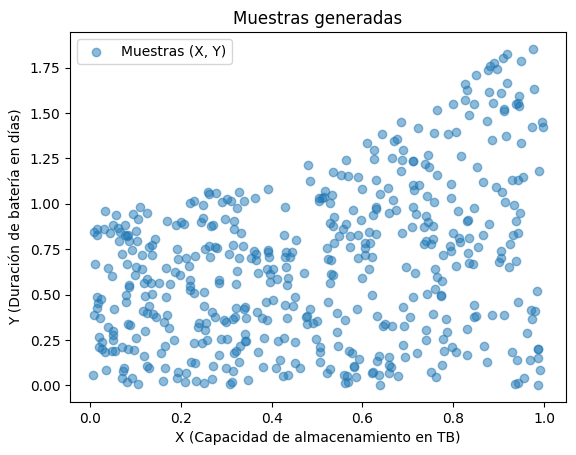

In [15]:
#librerias
import numpy as np
import matplotlib.pyplot as plt

#cantidad de muestras para el dataset
N = 500

#genero 500 datos de X con distribucion uniforme en el intervalo 0<x<1
X = np.random.uniform(0,1,N)

#a partir de los datos de X, generamos los datos de Y, sabiendo que Y|X=x ~ U(0,1+x^2). 
Y = np.random.uniform(0, 1+X**2, N)

# Graficar los puntos generados
plt.scatter(X, Y, alpha=0.5, label="Muestras (X, Y)")
plt.xlabel("X (Capacidad de almacenamiento en TB)")
plt.ylabel("Y (Duración de batería en días)")
plt.title("Muestras generadas")
plt.legend()
plt.show()

La regresión lineal se expresa de la siguiente manera:

$$
\hat Y = w^T \ X + b
$$

Para poder resolver la regresión lineal de forma matricial, podemos definir las siguientes variables:

$$
\mathbf{X} =
\begin{pmatrix}
1 & X_1^T \\
1 & X_2^T \\
\vdots & \vdots \\
1 & X_n^T
\end{pmatrix}
,\quad
\mathbf{y} =
\begin{pmatrix}
Y_1 \\
Y_2 \\
\vdots \\
Y_n
\end{pmatrix}
,\quad
\mathbf{w} =
\begin{pmatrix}
b \\
w
\end{pmatrix}
$$

Reescribiendo, nos queda la siguiente ecuacion que representa la regresión lineal matricial:

$$
\mathbf{\hat Y} = \mathbf{w^T} \ \mathbf{X}
$$

Lo que se busca es encontrar $\mathbf{w}$ que minimice $|| \mathbf{w^T} \ \mathbf{X} - \mathbf{y} ||^2$.

Se puede encontrar el $\mathbf{w}$ óptimo, resolviendo la ecuación normal, es decir:

$$
\mathbf{w} = \mathbf{X^\dagger} \ \mathbf{y}
$$

Donde $\mathbf{X^\dagger} = (\mathbf{X^T} \ \mathbf{X})^{-1} \ \mathbf{X^T}$ es la pseudo inversa de Moore-Penrose

En el codigo se puede ver el algoritmo implementado para la regresión lineal matricial.  


In [16]:
#Nos piden implementar una regresion lineal matricial.
#Defino la clase regresion lineal

class regresion_lineal:
    #Inicializador
    def __init__(self):
        self.w_ = None
        self.b_ = None

    #Etapa de entrenamiento
    def fit(self, X, y):
        #agrego una columna de unos para luego poder resolver la regresion lineal de forma matricial
        X_bias = np.c_[np.ones(X.shape[0]), X]

        # Resuelvo la ecuación normal: W = (X^T X)^(-1) X^T y
        W = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

        #de W obtengo los parametros b y w
        self.b_ = W[0]
        self.w_ = W[1]

    #Etapa de testeo
    def predict(self, X):
        #agrego una columna de unos 
        X_bias = np.c_[np.ones(1), X]

        #resuelvo el producto matricial
        return X_bias @ np.r_[self.b_, self.w_]
    
    #Metodo para obtener los parametros b y w
    def get_param(self):
        return self.b_, self.w_
    
#una vez definida la clase, pasamos a entrenar el regresor con los datos generados previamente

#generamos una instancia del regresor
reglin = regresion_lineal()

#entrenamos el regresor con los datos generados
reglin.fit(X,Y)

#obtenemos los parametros
b_obtenida, w_obtenida = reglin.get_param()

print(f"w = : {w_obtenida}")
print(f"b = : {b_obtenida}")




w = : 0.5239309711378397
b = : 0.39674456602739294


In [17]:
#una vez entrenado el regresor, nos piden predecir la duracion de una bateria de 256GB

x = 0.256 #duracion de la bateria en TB

y_hat = reglin.predict(x) #estimacion de la duracion de la bateria a partir del regresor

print(f"Duracion de la bateria estimada : {y_hat}")

Duracion de la bateria estimada : [0.53087089]


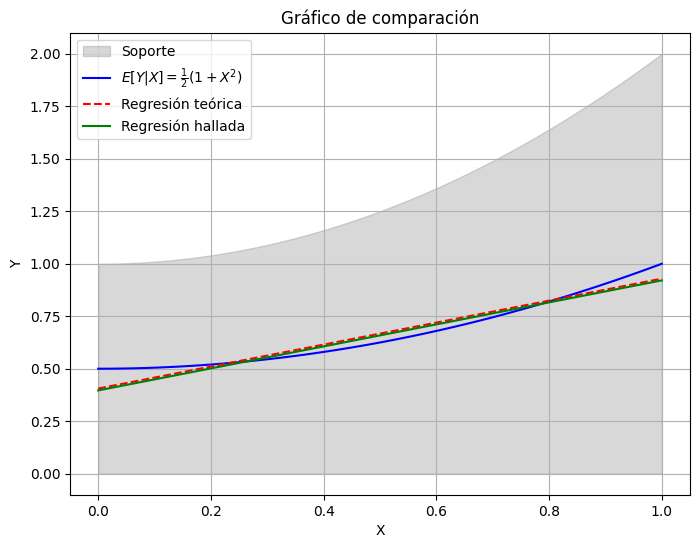

In [18]:
#grafico de comparacion

# Defino el rango de X
x = np.linspace(0, 1, 100)

# Soporte: 0 < y < 1 + x^2
y_min = np.zeros_like(x)
y_max = 1 + x**2

# Esperanza condicional E[Y|X] = (1/2) * (1 + X^2)s
E_cond = 0.5 * (1 + x**2)

# Recta de regresión teórica Y_hat = (217/535) + (56/107) * X
Y_hat = (217/535) + (56/107) * x

# Recta de regresión obtenida

Y_hat_obtenida = b_obtenida + w_obtenida * x


# Grafico de comparacion
plt.figure(figsize=(8, 6))

# Grafico el soporte como un área sombreada
plt.fill_between(x, y_min, y_max, color='gray', alpha=0.3, label="Soporte")

# Grafico la esperanza condicional
plt.plot(x, E_cond, 'b-', label=r"$E[Y|X] = \frac{1}{2} (1 + X^2)$")

# Grafico la recta de regresión teórica
plt.plot(x, Y_hat, 'r--', label=r"Regresión teórica")

# Grafico la recta de regresión hallada
plt.plot(x, Y_hat_obtenida, 'g-', label="Regresión hallada")

# Etiquetas y leyenda
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Gráfico de comparación")
plt.grid(True)

plt.show()


# Gradiente descendente

<p align="center">
  <image src="https://github.com/walteraguirre/TPS/blob/main/TP01/imagenes/ej_e.png?raw=true" alt="Descripción de la imagen">
</p>


Para implementar el algoritmo del gradiente descendente, se define la función costo como:

$$
J(w) = \frac{1}{n} \left\| X \ w - y \right\|^2
$$

Desarrollando la expresión:

$$
J(w) = \frac{1}{n} \left( X \ w - y \right)^T \left( X \ w - y \right)
$$

$$
J(w) = \frac{1}{n} \left( w^T X^T X w - 2 y^T X w + y^T y \right)
$$

Con esta expresion de la función costo, aplicando propiedades de derivadas matriciales, podemos obtener el gradiente de la funcion costo. La expresión resultante es:

$$
\nabla J(w)=\frac{2}{n} (X^T \ X \ w - X^T \ y)
$$

Tambien se define el Hessiano de la función costo como:

$$
H = \nabla^2 J(w) = \frac{2}{n} X^T X
$$

Para encontrar el $w$ óptimo mediante este método, en cada iteración, se irá actualizando el parametro $w$ de la siguiente manera:

$$
w_{(t+1)} = w_{(t)} - \alpha \nabla J(w_{(t)})
$$

Donde $\alpha$ es una constante que conocemos como learning rate. Podemos hallar el $\alpha$ óptimo o se puede elegir otro valor siempre y cuando el algoritmo converja.

El $\alpha$ óptimo se puede encontrar de la siguiente forma:

$$
\alpha^* = \frac{2}{\lambda_{max} + \lambda{min}}
$$

Donde $\lambda_{max}$ y $\lambda_{min}$ son los autovalores máximo y mínimo de la matriz H.

In [19]:
#nos piden implementar el algoritmo de gradiente descendiente

#defino la clase regresion_lineal_2 donde se aplicará el algoritmo del descenso del gradiente

import numpy as np

class regresion_lineal_2:

    # Inicializador
    def __init__(self, alpha=None, num_iter=1000):
        self.w_ = None
        self.b_ = None

        self.W = None

        self.alpha = alpha
        self.num_iter = num_iter

    # Etapa de entrenamiento
    def fit(self, X, y):

        #agrego una columna de unos para luego poder resolver la regresion lineal
        X_bias = np.c_[np.ones(X.shape[0]), X]

        n, d = X_bias.shape #dimensiones de la matriz X

        #inicializo la matriz de pesos W en 0
        self.W = np.zeros(d)


        # Si no se especifica el learning rate alpha, lo calculamos hallando el alpha optimo
        if self.alpha is None:
            # Cálculo del Hessiano para determinar el learning rate óptimo si no se proporciona
            H = (2 / n) * (X_bias.T @ X_bias)

            Lambda = np.linalg.eigvals(H)  # obtengo los autovalores de H
            
            self.alpha = 2 / (np.max(Lambda) + np.min(Lambda))  # Learning rate óptimo

        # Descenso del gradiente
        for _ in range(self.num_iter):

            #calculo el gradiente:
            grad_W = (2/n) * (X_bias.T @ X_bias @ self.W - X_bias.T @ y)

            # Actualizamos parámetros
            self.W -= self.alpha * grad_W

        self.b_ = self.W[0]
        self.w_ = self.W[1]

    # Etapa de testeo
    def predict(self, X):
        X_bias = np.c_[np.ones(1), X]
        return X_bias @ self.W  # y_hat = X w 

    # Método para obtener los parámetros w y b
    def get_param(self):
        return self.b_, self.w_


# Creamos el modelo y lo entrenamos
reglin2 = regresion_lineal_2(num_iter=1000)
reglin2.fit(X, Y)

# Obtenemos los parámetros aprendidos
b_obtenido, w_obtenido = reglin2.get_param()

print(f"w obtenido: {w_obtenido}")
print(f"b obtenido: {b_obtenido}")

        

w obtenido: 0.5239309711378421
b obtenido: 0.39674456602739133


In [20]:
#una vez entrenado el regresor, nos piden predecir la duracion de una bateria de 256GB

x = 0.256 #duracion de la bateria en TB

y_hat = reglin2.predict(x) #estimacion de la duracion de la bateria a partir del regresor

print(f"Duracion de la bateria estimada : {y_hat}")

Duracion de la bateria estimada : [0.53087089]


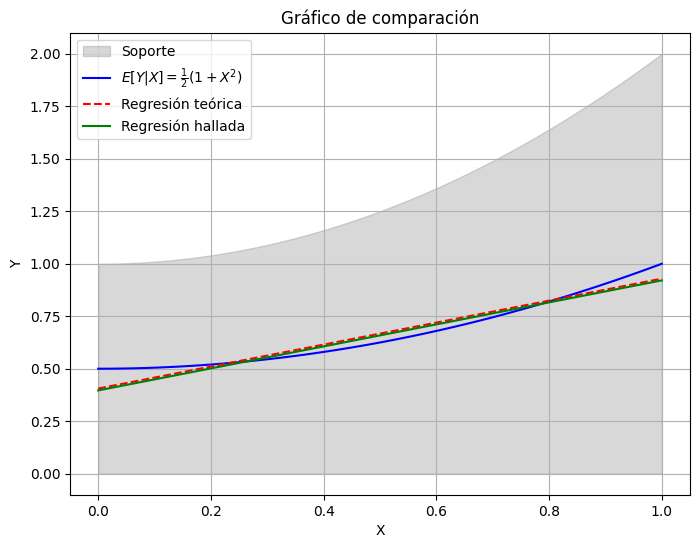

In [21]:
#grafico de comparacion

# Defino el rango de X
x = np.linspace(0, 1, 100)

# Soporte: 0 < y < 1 + x^2
y_min = np.zeros_like(x)
y_max = 1 + x**2

# Esperanza condicional E[Y|X] = (1/2) * (1 + X^2)
E_cond = 0.5 * (1 + x**2)

# Recta de regresión teórica Y_hat = (217/535) + (56/107) * X
Y_hat = (217/535) + (56/107) * x

# Recta de regresión obtenida

Y_hat_obtenida = b_obtenida + w_obtenida * x


# Grafico de comparacion 
plt.figure(figsize=(8, 6))

# Grafico el soporte como un área sombreada
plt.fill_between(x, y_min, y_max, color='gray', alpha=0.3, label="Soporte")

# Grafico la esperanza condicional
plt.plot(x, E_cond, 'b-', label=r"$E[Y|X] = \frac{1}{2} (1 + X^2)$")

# Grafico la recta de regresión teórica
plt.plot(x, Y_hat, 'r--', label=r"Regresión teórica")

# Grafico la recta de regresión hallada
plt.plot(x, Y_hat_obtenida, 'g-', label="Regresión hallada")

# Etiquetas y leyenda
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Gráfico de comparación")
plt.grid(True)

plt.show()